In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('Data.csv', header=None)

In [3]:
df.head()

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh


In [4]:
df[0]

0           3 PM  Mon 24th-Mar-2014___0.384 kwh  
1                  5AM  15-Aug-2014___1.201  kwh 
2            __8PM Thu 20-Mar-2014____1.523 kwh  
3                 6PM  23rd-Apr-2014___0.424  kwh
4       _1AM  Friday 19th-Dec-2014___0.209  kwh  
                          ...                    
8755           _1AM  Fri 07th-Nov-2014_0.084 kwh 
8756                  _6AM 20-May-2014__1.027 kwh
8757     __2 AM  Tuesday 8th-Apr-2014___0.052 kwh
8758              9 PM 27th-Jan-2014_1.428  kwh  
8759            _12 PM 25th-Aug-2014_0.528  kwh  
Name: 0, Length: 8760, dtype: object

In [5]:
df[0]=df[0].apply(lambda d: re.sub(r'[_ ]', r'', d))

In [6]:
df.head()

,0
0,3PMMon24th-Mar-20140.384kwh
1,5AM15-Aug-20141.201kwh
2,8PMThu20-Mar-20141.523kwh
3,6PM23rd-Apr-20140.424kwh
4,1AMFriday19th-Dec-20140.209kwh


In [7]:
def for_time(a):
    x=''
    for i in a:
        x+=i
        if i=='M':
            return x

In [8]:
df_main=pd.DataFrame()

In [9]:
df_main['clock']=df[0].apply(for_time)

In [10]:
df_main.head()

,clock
0,3PM
1,5AM
2,8PM
3,6PM
4,1AM


In [11]:
def for_del(a,b):
    return a.replace(b,'')

In [12]:
df[0]=df[0].apply(lambda d: for_del(d,for_time(d)))

In [13]:
df[0]

0          Mon24th-Mar-20140.384kwh
1               15-Aug-20141.201kwh
2            Thu20-Mar-20141.523kwh
3             23rd-Apr-20140.424kwh
4       Friday19th-Dec-20140.209kwh
                   ...             
8755       Fri07th-Nov-20140.084kwh
8756            20-May-20141.027kwh
8757    Tuesday8th-Apr-20140.052kwh
8758          27th-Jan-20141.428kwh
8759          25th-Aug-20140.528kwh
Name: 0, Length: 8760, dtype: object

In [14]:
def for_week_day(a):
    x=''
    for i in a:
        if i.isalpha():
            x+=i
        else:
            return x

In [15]:
df_main['day_of_week']=df[0].apply(for_week_day)

In [16]:
df_main.head()

,clock,day_of_week
0,3PM,Mon
1,5AM,
2,8PM,Thu
3,6PM,
4,1AM,Friday


In [17]:
df[0]=df[0].apply(lambda d: for_del(d,for_week_day(d)))

In [18]:
df[0]

0       24th-Mar-20140.384kwh
1         15-Aug-20141.201kwh
2         20-Mar-20141.523kwh
3       23rd-Apr-20140.424kwh
4       19th-Dec-20140.209kwh
                ...          
8755    07th-Nov-20140.084kwh
8756      20-May-20141.027kwh
8757     8th-Apr-20140.052kwh
8758    27th-Jan-20141.428kwh
8759    25th-Aug-20140.528kwh
Name: 0, Length: 8760, dtype: object

In [19]:
df[0]=df[0].apply(lambda d: d.split('-'))

In [20]:
df_main['day']=df[0].apply(lambda d: d[0])

In [21]:
df_main['month']=df[0].apply(lambda d: d[1])

In [22]:
df[0]=df[0].apply(lambda d: d[2])

In [23]:
df_main.head()

,clock,day_of_week,day,month
0,3PM,Mon,24th,Mar
1,5AM,,15,Aug
2,8PM,Thu,20,Mar
3,6PM,,23rd,Apr
4,1AM,Friday,19th,Dec


In [24]:
df_main['year']=df[0].apply(lambda d: d[:4])

In [25]:
df_main['electricity usage']=df[0].apply(lambda d: for_del(d,d[:4]))

In [26]:
df_main.head()

,clock,day_of_week,day,month,year,electricity usage
0,3PM,Mon,24th,Mar,2014,0.384kwh
1,5AM,,15,Aug,2014,1.201kwh
2,8PM,Thu,20,Mar,2014,1.523kwh
3,6PM,,23rd,Apr,2014,0.424kwh
4,1AM,Friday,19th,Dec,2014,0.209kwh


In [27]:
df_main['am_pm']=df_main['clock'].apply(lambda d: re.findall('AM|PM',d)[0])

In [28]:
df_main['clock']=df_main['clock'].apply(lambda d: for_del(d,re.findall('AM|PM',d)[0]))

In [29]:
df_main

,clock,day_of_week,day,month,year,electricity usage,am_pm
0,3,Mon,24th,Mar,2014,0.384kwh,PM
1,5,,15,Aug,2014,1.201kwh,AM
2,8,Thu,20,Mar,2014,1.523kwh,PM
3,6,,23rd,Apr,2014,0.424kwh,PM
4,1,Friday,19th,Dec,2014,0.209kwh,AM
...,...,...,...,...,...,...,...
8755,1,Fri,07th,Nov,2014,0.084kwh,AM
8756,6,,20,May,2014,1.027kwh,AM
8757,2,Tuesday,8th,Apr,2014,0.052kwh,AM
8758,9,,27th,Jan,2014,1.428kwh,PM


In [30]:
df_main['kwh']=df_main['electricity usage'].apply(lambda d: re.findall('kwh',d)[0])

In [31]:
df_main['electricity usage']=df_main['electricity usage'].apply(lambda d: for_del(d,re.findall('kwh',d)[0]))

In [32]:
df_main.head()

,clock,day_of_week,day,month,year,electricity usage,am_pm,kwh
0,3,Mon,24th,Mar,2014,0.384,PM,kwh
1,5,,15,Aug,2014,1.201,AM,kwh
2,8,Thu,20,Mar,2014,1.523,PM,kwh
3,6,,23rd,Apr,2014,0.424,PM,kwh
4,1,Friday,19th,Dec,2014,0.209,AM,kwh


In [33]:
df_main['day'].unique()

array(['24th', '15', '20', '23rd', '19th', '7th', '25', '14', '25th',
       '11th', '11', '28', '01', '04th', '24', '26', '23', '17th', '28th',
       '8th', '21', '17', '2', '1st', '03', '08', '8', '03rd', '9',
       '15th', '31', '21st', '26th', '02nd', '30', '13th', '7', '18th',
       '13', '5th', '6th', '6', '09', '5', '16th', '3', '07', '05',
       '22nd', '16', '29th', '07th', '22', '18', '19', '20th', '1',
       '30th', '12', '2nd', '06th', '31st', '14th', '04', '12th', '29',
       '27', '01st', '4', '9th', '10', '3rd', '4th', '27th', '10th',
       '08th', '09th', '06', '02', '05th'], dtype=object)

In [34]:
def del_suffix(a):
    if re.findall('th|st|nd|rd',a):
        return a.replace(re.findall('th|st|nd|rd',a)[0],'')
    else:
        return a

In [35]:
df_main['day']=df_main['day'].apply(lambda d: del_suffix(d))

In [36]:
df_main.head()

,clock,day_of_week,day,month,year,electricity usage,am_pm,kwh
0,3,Mon,24,Mar,2014,0.384,PM,kwh
1,5,,15,Aug,2014,1.201,AM,kwh
2,8,Thu,20,Mar,2014,1.523,PM,kwh
3,6,,23,Apr,2014,0.424,PM,kwh
4,1,Friday,19,Dec,2014,0.209,AM,kwh


In [37]:
df_main['month'].unique()

array(['Mar', 'Aug', 'Apr', 'Dec', 'Jul', 'Nov', 'Jan', 'Feb', 'May',
       'Jun', 'Sep', 'Oct'], dtype=object)

In [38]:
def for_months(a):
    if a=='Jan':
        return 1
    elif a=='Feb':
        return 2
    elif a=='Mar':
        return 3
    elif a=='Apr':
        return 4
    elif a=='May':
        return 5
    elif a=='Jun':
        return 6
    elif a=='Jul':
        return 7
    elif a=='Aug':
        return 8
    elif a=='Sep':
        return 9
    elif a=='Oct':
        return 10
    elif a=='Nov':
        return 11
    else:
        return 12

In [39]:
df_main['month']=df_main['month'].apply(lambda d: for_months(d))

In [40]:
df_main['date']=pd.to_datetime(df_main[['day','month','year']])

In [41]:
df_main

,clock,day_of_week,day,month,year,electricity usage,am_pm,kwh,date
0,3,Mon,24,3,2014,0.384,PM,kwh,2014-03-24
1,5,,15,8,2014,1.201,AM,kwh,2014-08-15
2,8,Thu,20,3,2014,1.523,PM,kwh,2014-03-20
3,6,,23,4,2014,0.424,PM,kwh,2014-04-23
4,1,Friday,19,12,2014,0.209,AM,kwh,2014-12-19
...,...,...,...,...,...,...,...,...,...
8755,1,Fri,07,11,2014,0.084,AM,kwh,2014-11-07
8756,6,,20,5,2014,1.027,AM,kwh,2014-05-20
8757,2,Tuesday,8,4,2014,0.052,AM,kwh,2014-04-08
8758,9,,27,1,2014,1.428,PM,kwh,2014-01-27


In [42]:
df_main['day_of_week']=df_main['date'].apply(lambda d: d.strftime('%A'))

In [43]:
df_main

,clock,day_of_week,day,month,year,electricity usage,am_pm,kwh,date
0,3,Monday,24,3,2014,0.384,PM,kwh,2014-03-24
1,5,Friday,15,8,2014,1.201,AM,kwh,2014-08-15
2,8,Thursday,20,3,2014,1.523,PM,kwh,2014-03-20
3,6,Wednesday,23,4,2014,0.424,PM,kwh,2014-04-23
4,1,Friday,19,12,2014,0.209,AM,kwh,2014-12-19
...,...,...,...,...,...,...,...,...,...
8755,1,Friday,07,11,2014,0.084,AM,kwh,2014-11-07
8756,6,Tuesday,20,5,2014,1.027,AM,kwh,2014-05-20
8757,2,Tuesday,8,4,2014,0.052,AM,kwh,2014-04-08
8758,9,Monday,27,1,2014,1.428,PM,kwh,2014-01-27


In [44]:
#clean edilmis datanin excele export edilmesi
Chevirme= 'cleaned_data_export_excel.xlsx'
df_main.to_excel(Chevirme, index=False)
print("Temiz Data export edildi:", Chevirme)


Temiz Data export edildi: cleaned_data_export_excel.xlsx


In [45]:
df_main1=df_main.drop(['day','month','year'], axis=1,inplace=True)

In [46]:
df_main1

In [47]:
df_main2=df_main[['clock','am_pm','date','day_of_week','electricity usage','kwh']]

In [48]:
df_main2.head()

,clock,am_pm,date,day_of_week,electricity usage,kwh
0,3,PM,2014-03-24,Monday,0.384,kwh
1,5,AM,2014-08-15,Friday,1.201,kwh
2,8,PM,2014-03-20,Thursday,1.523,kwh
3,6,PM,2014-04-23,Wednesday,0.424,kwh
4,1,AM,2014-12-19,Friday,0.209,kwh


1.Orta saatlıq elektrik istifadəniz nə qədərdir? ---------- b. 0,782 kVt/saat

In [49]:
df_main2['electricity usage'] = df_main2['electricity usage'].astype(float)

In [50]:
average_hourly_usage = df_main2["electricity usage"].mean()
average_hourly_usage

0.7818779680365298

2.Fevral ayında saatda orta hesabla nə qədər elektrik istifadə edilir? ----d. 0,833 kVt/saat

In [51]:
february_data = df_main2[df_main2['date'].dt.month == 2]

average_usage_february = february_data["electricity usage"].mean()
average_usage_february

0.8329151785714286

3.Həftənin hansı günü ən yüksək orta istifadəyə malikdir? ----------- a. sunday

In [52]:
average_usage_per_day = df_main2.groupby("day_of_week")["electricity usage"].mean()

highest_average_day = average_usage_per_day.idxmax()
highest_average_value = average_usage_per_day.max()

print("Ən Yüksək Orta sərfiyyat olunan gün:", highest_average_day)
print("Ən Yüksək Orta sərfiyyat:", highest_average_value)

Ən Yüksək Orta sərfiyyat olunan gün: Sunday
Ən Yüksək Orta sərfiyyat: 0.8981570512820514


4.Davamlı 4 saat ərzində istifadə olunan ən elektrik enerjisi nə qədərdir?- a. 17,237 kVt/saat

In [53]:
# AM/PM ilə "saat" sütununu tarixə çeviririk
df_main['timestamp'] = pd.to_datetime(df_main2['clock'].astype(str) + df_main2['am_pm'], format='%I%p')

# DataFrame-i tarix və vaxt duzuruk
df_main.sort_values(by=["date", "timestamp"], inplace=True)

# Hər 4 saatlıq period üçün elektrik istifadəsinin cəmini hesablayıriq
max_sum = 0
for i in range(len(df_main2) - 3):
    sum_usage = df_main2["electricity usage"].iloc[i:i+4].sum()
    max_sum = max(max_sum, sum_usage)

print("Davamli 4 saatliq müddətdə istifadə edilən ən yüksək elektrik enerjisi:", max_sum)

Davamli 4 saatliq müddətdə istifadə edilən ən yüksək elektrik enerjisi: 10.594


5 ve 6 ci suallari hell etmek ucun melumat eksikdir. Price yoxdur

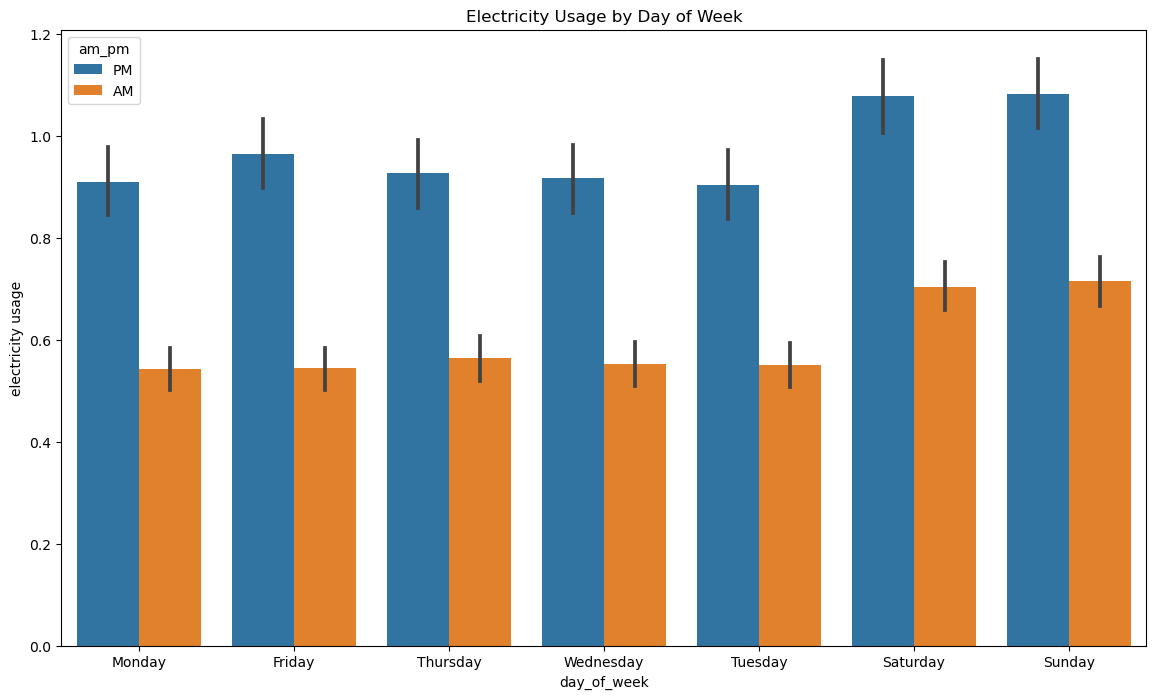

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.barplot(x="day_of_week", y="electricity usage", data=df_main2, hue="am_pm")
plt.title("Electricity Usage by Day of Week")
plt.show()



In [55]:
df_main2

,clock,am_pm,date,day_of_week,electricity usage,kwh
0,3,PM,2014-03-24,Monday,0.384,kwh
1,5,AM,2014-08-15,Friday,1.201,kwh
2,8,PM,2014-03-20,Thursday,1.523,kwh
3,6,PM,2014-04-23,Wednesday,0.424,kwh
4,1,AM,2014-12-19,Friday,0.209,kwh
...,...,...,...,...,...,...
8755,1,AM,2014-11-07,Friday,0.084,kwh
8756,6,AM,2014-05-20,Tuesday,1.027,kwh
8757,2,AM,2014-04-08,Tuesday,0.052,kwh
8758,9,PM,2014-01-27,Monday,1.428,kwh


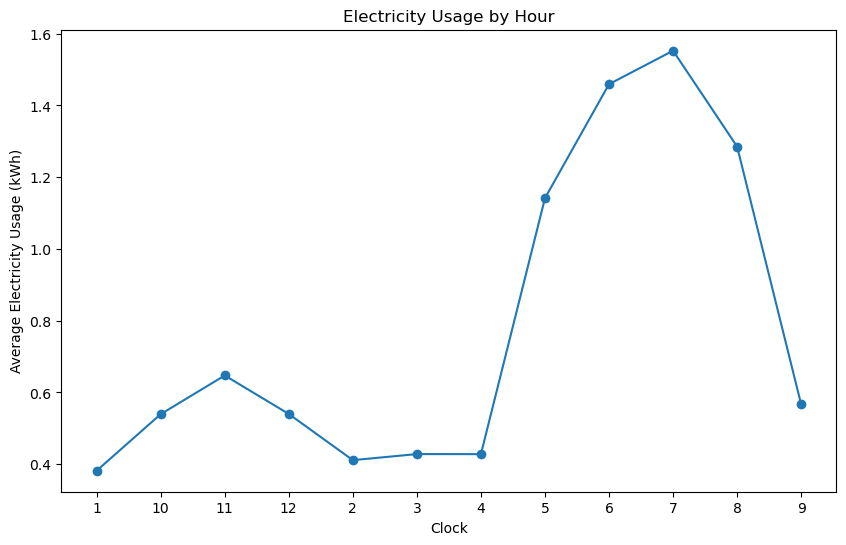

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
hourly_avg = df_main2.groupby("clock")["electricity usage"].mean()
plt.figure(figsize=(10, 6))
plt.title("Electricity Usage by Hour")
plt.xlabel("Clock")
plt.ylabel("Average Electricity Usage (kWh)")
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xticks(hourly_avg.index)
plt.show()
